# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt 
# (a) Load data (features)
def load_data():
    Xdata = np.load('features.npy')
    data = (Xdata - Xdata.mean(axis=0)) / Xdata.std(axis=0)
    return data



Ydata = np.load('labels.npy', allow_pickle=True)
Ydata = Ydata.reshape(-1,1)


FileNotFoundError: [Errno 2] No such file or directory: 'labels.npy'

In [48]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    print(X.shape)
    Sigma = np.cov(X.T,bias=False)
    lam,v = eig(Sigma)
    idx = lam.argsort()[::-1]   
    sorted_eig_vals = lam[idx]
    sorted_eig_vecs = v[:,idx]
    

    return (sorted_eig_vals, sorted_eig_vecs)


In [49]:
# (c) Evaluate using variance_explained as the metric
def eval(X):
    k = X.shape[1]
    var = np.zeros(k)
    for i in range(k):
        sorted_eig_vals,sorted_eig_vecs = eigendecomp(X)
        var[i] = np.sum(sorted_eig_vals[:i+1])/np.sum(sorted_eig_vals)
    print("Variance: ", var)
    pass


In [50]:
# (d) Visualize after projecting to 2-D space
def viz(X):
    sorted_eig_vals, sorted_eig_vecs = eigendecomp(X)
    newData = np.matmul(X,sorted_eig_vecs[:,:2])
    Ydata = np.load('labels.npy', allow_pickle=True)
    Ydata = Ydata.reshape(-1,)

    newD0 = newData[np.where(Ydata == 0)]
    newD1 = newData[np.where(Ydata == 1)]
    newD2 = newData[np.where(Ydata == 2)]
    plt.scatter(newD0[:,0],newD0[:,1],c='r',label = 'Label 0')
    plt.scatter(newD1[:,0],newD1[:,1],c='b',label = 'Label 1')
    plt.scatter(newD2[:,0],newD2[:,1],c='y',label = 'Label 2')
    plt.legend()
    plt.show()

    print("Sorted eigenvalues: ", sorted_eig_vals)
    print("Sorted eigenvectors: ", sorted_eig_vecs)
    pass


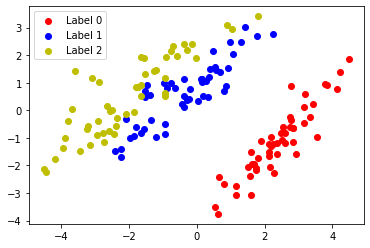

Sorted eigenvalues:  [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  8.43406727e-16  6.34199026e-18 -7.03281987e-16]
Sorted eigenvectors:  [[-0.39124937  0.13884872 -0.46160937  0.58034539  0.24934936  0.09320476
  -0.42116938  0.20978664]
 [ 0.11687696 -0.4391715  -0.78711289 -0.2905579  -0.12725786  0.14672413
   0.20605814  0.07280114]
 [-0.40655289  0.29080021 -0.13961871 -0.12636707 -0.54994554  0.21509872
  -0.06875535 -0.59631459]
 [-0.39944906  0.26454833 -0.16206048 -0.54404218  0.49904279 -0.43718158
   0.05521708 -0.06355642]
 [-0.3778555  -0.35426671  0.07790627  0.42060984  0.12822569 -0.14645517
   0.66179491 -0.32964346]
 [-0.09816172 -0.64299795  0.11941452 -0.04972667 -0.0795516  -0.40331041
  -0.56640575 -0.20011335]
 [-0.45509399 -0.03231459  0.12200908 -0.08034689 -0.51935676 -0.23707109
   0.07577872  0.65722825]
 [-0.38587285 -0.30545597  0.29393481 -0.28457653  0.27864817  0.70148315
  -0.08859901  0.10197996]]
Variance:  [0.588

In [51]:
def main():
    X = load_data()
    viz(X)
    eval(X)
if __name__ == "__main__":
    main()


The value of k should be chosen as 3. We are able to preserve almost all the information of the original data. For k=4, we are getting better results but it also increases computation time. There is a atrade-off between computation time and dimensionality reduction. Here, I am choosing k=3 as we have preserved 97.04% of the information and saving the compuatation time.

![PCA misleading results sample dataset](./1.png)